<a href="https://colab.research.google.com/github/B-FERL/B-FERL-repository/blob/main/2017ddos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Import Pandas,Seaborn,Matplotlib and Numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#Import the dataset

dataset = pd.read_csv('/content/gdrive/MyDrive/Friday-WorkingHours-Afternoon-DDos.csv')

In [ ]:
dataset[' Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [ ]:
#Data Cleaning

dataset[' Label'].replace('BENIGN',0,inplace=True)
dataset[' Label'].replace('DDoS',1,inplace=True)

In [ ]:
dataset.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,1.174168e+04,1956.947162,1022.0,0.0,1022,1022,1022,1022.0,0.0,1022,1022,0,0.0,0.0,0,0,0,0,0,0,40,0,1956.947162,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,54925,4,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,54925,42,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.857143e+05,47619.047620,42.0,0.0,42,42,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,23809.523810,23809.523810,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,32,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,9282,4,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,55153,4,2,0,37,0,31,6,18.5,17.67767,0,0,0.0,0.0,9.250000e+06,500000.000000,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,1,0,0,0,40,0,500000.000000,0.000000,6,31,22.666667,14.433757,208.333333,0,1,0,0

In [ ]:
# Aggregate functions

print("Statistical Summary ")
dataset.describe()

Statistical Summary 


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257410e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,890.536849,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.522718,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,164.826715,890.536849,111.522718,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,939.463346,4.572775,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,1120.324921,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.790727,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.892965,1120.324921,375.790727,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3249.403484,21.755356,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1

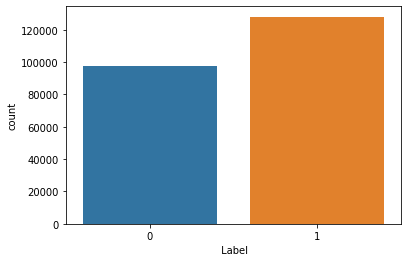

In [ ]:
# DATA VISUALIZATION  using matplotlib and seaborn

sns.countplot( x = ' Label' , data = dataset )
plt.show()

In [ ]:
# DATA PREPROCESSING 

#Create copy of the dataset

dataset_new = dataset



In [ ]:
# Replace zero with NaN

dataset_new[["Total Length of Fwd Packets"," Subflow Fwd Bytes"," Avg Fwd Segment Size"," Total Length of Bwd Packets"," Subflow Bwd Packets"," Bwd Packet Length Mean"," Avg Bwd Segment Size"," Fwd Header Length"]] = dataset_new[["Total Length of Fwd Packets"," Subflow Fwd Bytes"," Avg Fwd Segment Size"," Total Length of Bwd Packets"," Subflow Bwd Packets"," Bwd Packet Length Mean"," Avg Bwd Segment Size"," Fwd Header Length"]].replace(0, np.NaN) 





In [ ]:
# Replacing NaN with mean values

dataset_new["Total Length of Fwd Packets"].fillna(dataset_new["Total Length of Fwd Packets"].mean(), inplace = True)
dataset_new[" Subflow Fwd Bytes"].fillna(dataset_new[" Subflow Fwd Bytes"].mean(), inplace = True)
dataset_new[" Avg Fwd Segment Size"].fillna(dataset_new[" Avg Fwd Segment Size"].mean(), inplace = True)
dataset_new[" Total Length of Bwd Packets"].fillna(dataset_new[" Total Length of Bwd Packets"].mean(), inplace = True)
dataset_new[" Subflow Bwd Packets"].fillna(dataset_new[" Subflow Bwd Packets"].mean(), inplace = True)
dataset_new[" Bwd Packet Length Mean"].fillna(dataset_new[" Bwd Packet Length Mean"].mean(), inplace = True)
dataset_new[" Avg Bwd Segment Size"].fillna(dataset_new[" Avg Bwd Segment Size"].mean(), inplace = True)
dataset_new[" Fwd Header Length"].fillna(dataset_new[" Fwd Header Length"].mean(), inplace = True)


In [ ]:
# Statistical data

print("Statistical summary")
dataset.describe()

Statistical summary


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257410e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,962.582903,8.102684e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,1210.597494,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.549402,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,168.882989,1210.597494,111.522718,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,962.582903,6.073956,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3246.059600,3.905521e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,984.936987,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.786767,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.230424,984.936987,375.790727,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3246.059600,21.597012,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1

In [ ]:
dataset =dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
# Feature scaling 

#import sklearn library for machine learning

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset)

dataset_scaled = pd.DataFrame(dataset_scaled)

X = dataset_scaled.iloc[:,[4,63,53,5,64,12,54,55]].values
Y = dataset_scaled.iloc[:,78].values
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42, stratify = dataset[' Label'] )

# Checking dimensions

print("Checking dimensions\n")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Checking dimensions

X_train shape: (157997, 8)
X_test shape: (67714, 8)
Y_train shape: (157997,)
Y_test shape: (67714,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from xgboost import XGBClassifier
import time
xgb = XGBClassifier(n_estimators=200,scale_pos_weight=5,min_child_weight=1,max_depth=2,random_state=5)
training_start = time.perf_counter()
xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_xg = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score

rfrecall = recall_score(Y_test , Y_pred_ranfor)
logrecall = recall_score(Y_test , Y_pred_logreg)
knnrecall = recall_score(Y_test , Y_pred_knn)
xgbrecall = recall_score(Y_test , Y_pred_xg)
decrecall = recall_score(Y_test , Y_pred_dectree)

print("Recall score for RF :" +str(rfrecall))
print("Recall score for Logreg :" +str(logrecall))
print("Recall score for KNN :" +str(knnrecall))
print("Recall score for Decision Tree :" +str(decrecall))
print("Recall score for XgBoost :" +str(xgbrecall))

Recall score for RF :0.9985419704228286
Recall score for Logreg :0.9992449489689648
Recall score for KNN :0.9985680066652781
Recall score for Decision Tree :0.9985159341803791
Recall score for XgBoost :0.9991408039991668


In [ ]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score

rfrecall = precision_score(Y_test , Y_pred_ranfor)
logrecall =precision_score(Y_test , Y_pred_logreg)
knnrecall = precision_score(Y_test , Y_pred_knn)
xgbrecall = precision_score(Y_test , Y_pred_xg)
decrecall = precision_score(Y_test , Y_pred_dectree)

print("Precision score for RF :" +str(rfrecall))
print("Precision score for Logreg :" +str(logrecall))
print("Precision score for KNN :" +str(knnrecall))
print("Precision score for Decision Tree :" +str(decrecall))
print("Precision score for XgBoost :" +str(xgbrecall))

Precision score for RF :0.9998435789144376
Precision score for Logreg :0.9339092347000851
Precision score for KNN :0.9997653928366613
Precision score for Decision Tree :0.9998435748364054
Precision score for XgBoost :0.9977899115964639


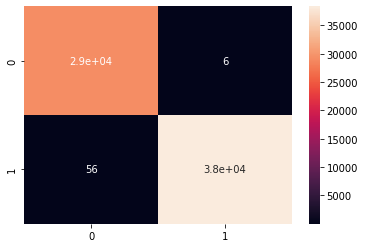

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)